[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)

# 3.3 Types constuits : les dictionnaires

## Définition

<div class="alert alert-info">
    <b>Définition</b>
    Un dictionnaire ( parfois appelé “<i>tableau associatif</i>" ou “<i>table de hachage</i>”) est une <b>collection non ordonnée</b> d’éléments.</div>
</div>

A partir d’une **clé** (unique) on accède à la **valeur** qui lui est associée.

Les dictionnaires, à l’instar des listes, sont **mutables** : on peut modifier leur contenu.
Les clés du dictionnaire doivent être **uniques** et **non mutables** (chaîne de caractères, nombre, tuple).
Les valeurs associées peuvent être d’un type quelconque.

Les listes chaînées (liste ou tuple en python) ne permettent pas d'accéder directement à un élément précis. Il faut parcourir la liste en avançant d'élément en élément jusqu'à trouver celui qu'on recherche. Cela pose des problèmes de performance dès que la liste chaînée devient volumineuse.



In [8]:
%timeit  'x' in range(10)

282 ns ± 0.216 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [2]:
%timeit 'x' in range(10_000)

191 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
%timeit 'x' in range(10_000_000)

225 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Mettons en évidence la linéarité entre le temps nécessaire à l'appartenance de l'élément 'x' à une liste d'entiers (pire des cas) et la longeur de la liste.

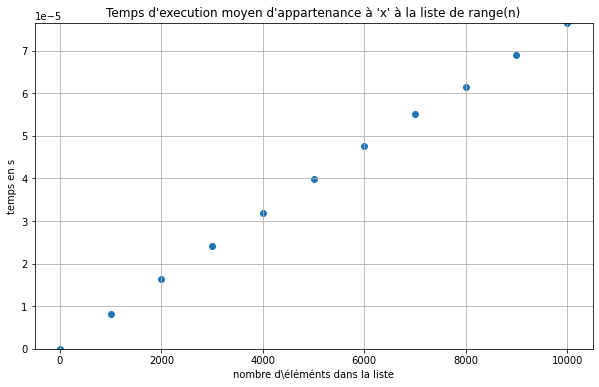

In [55]:
import matplotlib.pyplot as plt

quantites = [1000*n for n in range(0, 11)] # je crée la liste [0, 1000, 2000, ... 10000]
results = []
for q in quantites:
    l = [e for e in range(q)] # Je créé la liste
    stats = %timeit -q -o -n 200 'x' in l # 'x' n'appartient pas à la liste
    results.append(stats.average)

plt.figure(figsize=(10,6))
plt.ylim(top=max(results))
plt.scatter(quantites,results)
plt.grid(which='both')
plt.title("Temps d'execution moyen d'appartenance à 'x' à la liste de range(n)")
plt.xlabel('nombre d\éléménts dans la liste')
plt.ylabel('temps en s')
plt.show()

## Implémentation en Python

### Création d'un dictionnaire

- Pour créer un dictionnaire on utilise un couple d'accolades {}
- Les éléments du dictionnaire sont séparés par des virgules
- le couple clé/valeur est séparé par ':'

**Exemple :**

In [2]:
dico = {'nom':'Gérard', 'age':75, 'commentaire':'un lascar', 'enfants':['Maurice','Corinne']}
# J'ai un dictionnaire dont les clés sont : 'nom', 'age', 'commentaire' et 'enfants'
# La valeur de la clé 'age' est le nombre 75
# la valeur de la clé 'enfants' est une liste
dico

{'nom': 'Gérard',
 'age': 75,
 'commentaire': 'un lascar',
 'enfants': ['Maurice', 'Corinne']}

**Exemple2 :**

Un dictionnaire est **mutable**, on peut donc le modifier en le **peuplant** de clés/valeurs:

In [6]:
dico2 = {}  # Je crée un dictionnaire vide
dico2['nom'] = 'Brandon' # J'ajoute la clé/valeur nom:Brandon
dico2['age'] = 25
dico2['commentaire'] = 'un sacré bout en train'
dico2['enfants'] = ['Kevin', 'Sandy']
dico2

{'nom': 'Brandon',
 'age': 25,
 'commentaire': 'un sacré bout en train',
 'enfants': ['Kevin', 'Sandy']}

**Exemple 3 :**

Il est également possible de créer un dictionnaire par **compréhension**.

In [31]:
# voici une liste de tuples
l = [('nom', 'Barnabé'), ('age', 27), ('enfants', ['Gaston', 'Louise'])]
# créons un dictionnaire dont les clés sont les premiers éléments des tuples et les valeurs les deuxièmes.
dico3 = {k:v for k,v in l}
dico3

{'nom': 'Barnabé', 'age': 27, 'enfants': ['Gaston', 'Louise']}

### Accès à une donnée par clé

l'accès à une valeur s'effectue en spécifiant la clé:

In [7]:
dico2['age']

25

On peut également utiliser *get(key, [default])* qui retourne la valeur associée à *key* si celle ci est présente. Une valeur par défaut optionnelle est retournée si la clé est absente.

In [26]:
dico2.get('commentaire')

'un sacré bout en train'

In [27]:
dico2.get('pere', 'Non précisé')

'Non précisé'

### Itération sur un dictionnaire

Un dictionnaire est itérable. Voici le comportement.

In [29]:
for k in dico2:
    print(k)

nom
age
commentaire
enfants


On peut également avoir l'ensemble des valeurs en utilisant *values*.

In [32]:
for v in dico2.values():
    print(v)

Brandon
27
un sacré bout en train
['Kevin', 'Sandy']


### Modification des valeurs

Un dictionnaire est **mutable**, on peut donc modifier la valeur associée à une clé.

In [8]:
dico2['age'] = 27
dico2

{'nom': 'Brandon',
 'age': 27,
 'commentaire': 'un sacré bout en train',
 'enfants': ['Kevin', 'Sandy']}

### Attention aux affectations

<div class="alert alert-danger">
   Attention, ayez bien à l'esprit le comportement suivant lorsque vous écrivez du Python: 
    
</div>

In [12]:
personne1 = {'nom' : 'Poutine', 'prenom' : 'Vladimir'}
personne2 = personne1 # J'affecte la variable personne1 dans personne2

personne1['prenom'] = 'Vladimort' # Je modifie la personne 1
personne1

{'nom': 'Poutine', 'prenom': 'Vladimort'}

In [13]:
personne2

{'nom': 'Poutine', 'prenom': 'Vladimort'}

En modifiant *personne1*, j'ai également modifié *personne2*. Ces deux variables **pointent** vers la même référence en mémoire.

Et il en est de même pour les **listes**.

In [19]:
l1 = [1, 2, 3]
l2 = l1
l1.append(4)
print(f"l1 pointe sur l'adresse mémoire {id(l1)}")
print(f"l2 pointe sur l'adresse mémoire {id(l2)}")
l2

l1 pointe sur l'adresse mémoire 140575455811840
l2 pointe sur l'adresse mémoire 140575455811840


[1, 2, 3, 4]

Le comportement est **différent** pour les **chaines de caractères**.

In [23]:
mot1 = 'Bonjour'
mot2 = mot1
print(f"mot1 pointe sur l'adresse mémoire {id(mot1)}")
print(f"mot2 pointe sur l'adresse mémoire {id(mot2)}")

mot1 += 'r'
mot2
print(f"mot1 pointe sur l'adresse mémoire {id(mot1)}")
print(f"mot2 pointe sur l'adresse mémoire {id(mot2)}")

print(f"Maintenant mot1 vaut '{mot1}' alors que mot2 vaut '{mot2}'.")

mot1 pointe sur l'adresse mémoire 140575455813744
mot2 pointe sur l'adresse mémoire 140575455813744
mot1 pointe sur l'adresse mémoire 140575455843568
mot2 pointe sur l'adresse mémoire 140575455813744
Maintenant mot1 vaut 'Bonjourr' alors que mot2 vaut 'Bonjour'.


Si vous voulez **copier** un dictionnaire, ilfaut utiliser la fonction **copy**

In [24]:
personne1 = {'nom' : 'Poutine', 'prenom' : 'Vladimir'}
personne2 = personne1.copy() # J'affecte une copie de la variable personne1 dans personne2

personne1['prenom'] = 'Vladimort'
personne2 # personne2, n'aura pas été affecté par la modification de personne1

{'nom': 'Poutine', 'prenom': 'Vladimir'}

### Suppression de clé/valeur

si on désire supprimer une clé, on utilise la commande *del*.

In [34]:
del(dico2['commentaire'])
dico2

{'nom': 'Brandon', 'age': 27, 'enfants': ['Kevin', 'Sandy']}

### Temps d'accès en fonction de la taille du dictionnaire.

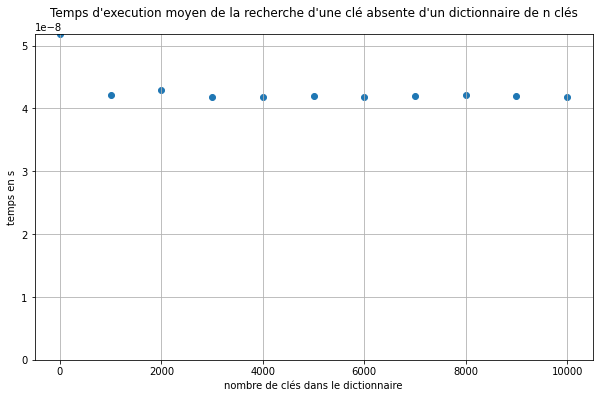

In [51]:
import matplotlib.pyplot as plt

quantites = [1000*n for n in range(0, 11)] # je crée la liste [0, 1000, 2000, ... 10000]
results = []
for q in quantites:
    d = {q:0 for q in range(q)} # Je crée un dictionnaire de q clés, ayant toutes la valeur 0
    stats = %timeit -q -o -n 100000 d.get(-1, 'rien') # le dictionnaire n'a pas la clé -1
    results.append(stats.average)

plt.figure(figsize=(10,6))
plt.ylim(top=max(results))
plt.scatter(quantites,results)
plt.grid(which='both')
plt.title("Temps d'execution moyen de la recherche d'une clé absente d'un dictionnaire de n clés")
plt.xlabel('nombre de clés dans le dictionnaire')
plt.ylabel('temps en s')
plt.show()

Contrairement aux listes, on constate que le temps de recherche d'une clé non présente dans le dictionnaire est **indépendante** de la taille du dictionnaire.

[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)